In [211]:
import warnings
warnings.simplefilter("ignore")
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import geopandas as gpd

from collections import Counter

In [213]:
def parse_json_gz(file_path):
        with open(file_path, 'r') as f:
            for line in f:
                yield json.loads(line)

In [440]:
reviews = list(parse_json_gz(r'C:\Users\lipin\ML Projects\Capstone Project Phase 1\Recommender System\SMART Local\data\review-Pennsylvania.json\review-Pennsylvania.json'))


In [215]:
metadata = list(parse_json_gz(r'C:\Users\lipin\ML Projects\Capstone Project Phase 1\Recommender System\SMART Local\data\meta-Pennsylvania.json\meta-Pennsylvania.json'))


In [432]:


pd.set_option('display.max_columns', None)

reviews = pd.DataFrame(reviews)
metadata = pd.DataFrame(metadata)
# Identify all columns with dtype 'object'
object_cols = reviews.select_dtypes(include=['object']).columns

# Convert those columns to string
reviews[object_cols] = reviews[object_cols].astype(str)
reviews.drop_duplicates(inplace=True)
# Identify all columns with dtype 'object'
object_cols = metadata.select_dtypes(include=['object']).columns

# Convert those columns to string
metadata[object_cols] = metadata[object_cols].astype(str)
metadata.drop_duplicates(inplace=True)

print("Reviews DataFrame:")
print(reviews.info())
print("\nMetadata DataFrame:")
print(metadata.info())
def merge_datasets(reviews, metadata, merge_on='gmap_id'):
    return pd.merge(reviews, metadata, on=merge_on, how='left')


object_cols = metadata.select_dtypes(include=['object']).columns



merged_data_df = merge_datasets(reviews, metadata)
def handle_missing_values(df, state='PA'):
    drop_subset = ['user_id', 'rating']
    text_columns = ['text', 'description', 'resp']
    categorical_columns = ['name_x', 'name_y', 'category', 'price', 'address', 'hours', 'MISC', 'url']
    
    # Dropping rows with missing critical fields
    df = df.dropna(subset=drop_subset)

    # Filling text columns with empty strings
    for col in text_columns:
        if col in df.columns:
            df[col] = df[col].fillna("")

    # #Filling state value
    # if 'state' in df.columns:
    #     df['state'] = state
    
    # Filling categorical columns with "unknown"
    for col in categorical_columns:
        if col in df.columns:
            df[col] = df[col].fillna("unknown")
    
    return df
df = handle_missing_values(merged_data_df)
if 'time' in df.columns:
    try:
        df['time'] = pd.to_datetime(df['time'], unit='ms')
    except Exception:
        df['time'] = pd.to_datetime(df['time'], errors='coerce')
numeric_fields = ['rating','user_id', 'avg_rating', 'num_of_reviews', 'latitude', 'longitude']
for field in numeric_fields:
    if field in df.columns:
        df[field] = pd.to_numeric(df[field], errors='coerce')
df.rename(columns={'name_x': 'customer_name', 'name_y': 'business_name'}, inplace=True)


NameError: name 'reviews' is not defined

In [15]:
df.head()

,user_id,customer_name,time,rating,text,pics,resp,gmap_id,business_name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.024128e+20,Jennifer Cordón,2021-09-01 20:59:37.304,5.0,Just had the German pizza. They made it exactl...,None,None,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",None,40.682177,-75.20982,['Pizza delivery'],4.5,25,$$,"[['Thursday', '11AM–9PM'], ['Friday', '11AM–10...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"['0x89c46c56cac9c661:0xdc9d0dd3f2b203ae', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,1.033004e+20,Luis Gonzalez,2021-09-02 00:56:12.046,5.0,"Great food, and great service! You should all ...",None,None,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",None,40.682177,-75.20982,['Pizza delivery'],4.5,25,$$,"[['Thursday', '11AM–9PM'], ['Friday', '11AM–10...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"['0x89c46c56cac9c661:0xdc9d0dd3f2b203ae', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,1.047158e+20,Jasson Cordon,2021-09-07 11:05:28.526,5.0,Good food and fair prices I Just Order a pizza...,None,None,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",None,40.682177,-75.20982,['Pizza delivery'],4.5,25,$$,"[['Thursday', '11AM–9PM'], ['Friday', '11AM–10...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"['0x89c46c56cac9c661:0xdc9d0dd3f2b203ae', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,1.077288e+20,Sharon Mendez,2021-09-01 01:43:59.875,5.0,Very good service and delicious food. I recomm...,None,None,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",None,40.682177,-75.20982,['Pizza delivery'],4.5,25,$$,"[['Thursday', '11AM–9PM'], ['Friday', '11AM–10...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"['0x89c46c56cac9c661:0xdc9d0dd3f2b203ae', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,1.087975e+20,Salvador Fuentes,2021-08-31 18:44:50.430,5.0,Great food and service. Best pizza l ever had.,None,None,0x89c46d5e4554eae1:0xa2f8b211524ca29a,Primo Pizza & Subs,"Primo Pizza & Subs, 148 W St Joseph St, Easton...",None,40.682177,-75.20982,['Pizza delivery'],4.5,25,$$,"[['Thursday', '11AM–9PM'], ['Friday', '11AM–10...","{'Service options': ['No-contact delivery', 'D...",Open ⋅ Closes 9PM,"['0x89c46c56cac9c661:0xdc9d0dd3f2b203ae', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [17]:
df.to_csv("./dataclean.csv")

In [19]:
object_cols = df.select_dtypes(include=['object']).columns

# Convert those columns to string
df[object_cols] = df[object_cols].astype(str)

columns_to_fix = df[object_cols] # Replace with actual column names
for col in columns_to_fix:
    df[col] = df[col].astype(str).str.replace("\x00", "", regex=True)

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
# Removing records with latitude and longitude outside of PA range

df.drop(df[df["longitude"] > -70].index, inplace = True)

df.drop(df[df["longitude"] < -80].index, inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18983693 entries, 0 to 21712797
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           float64       
 1   customer_name     object        
 2   time              datetime64[ns]
 3   rating            float64       
 4   text              object        
 5   pics              object        
 6   resp              object        
 7   gmap_id           object        
 8   business_name     object        
 9   address           object        
 10  description       object        
 11  latitude          float64       
 12  longitude         float64       
 13  category          object        
 14  avg_rating        float64       
 15  num_of_reviews    int64         
 16  price             object        
 17  hours             object        
 18  MISC              object        
 19  state             object        
 20  relative_results  object        
 21  url        

In [27]:
# Drop specified columns
df_new = df.drop(columns=['category', 'hours', 'MISC', 'relative_results','pics'])

# Sort by 'time' column
df_new = df_new.sort_values(by='time', ascending=True)

# Reset index and set as 'id'
df_new = df_new.reset_index(drop=True).rename_axis('id').reset_index()

# Display first few rows
df_new.head()


,id,user_id,customer_name,time,rating,text,resp,gmap_id,business_name,address,description,latitude,longitude,avg_rating,num_of_reviews,price,state,url
0,0,1.082528e+20,Hardeep chawla,1990-12-31,5.0,Finally a gastronomic experienece in Bucks cou...,None,0x89c15651a5aee36d:0xf7cdbf7dc059c957,Charcoal BYOB,"Charcoal BYOB, 11 S Delaware Ave, Yardley, PA ...","Creative, market-driven fare & river views are...",40.244506,-74.835622,4.6,513,$$,Closed ⋅ Opens 8AM,https://www.google.com/maps/place//data=!4m2!3...
1,1,1.064611e+20,Tim Downey,1990-12-31,4.0,"Good, traditional steakhouse. Professional se...",None,0x89c69441aa31c5b9:0x1bd7bceb16c01aa5,Creed's Seafood & Steaks,"Creed's Seafood & Steaks, 499 N Gulph Rd, King...",Steaks & seafood served in a comfortable setti...,40.089772,-75.413792,4.5,543,$$$,Closed ⋅ Opens 4PM,https://www.google.com/maps/place//data=!4m2!3...
2,2,1.054456e+20,jerrilyn marston,1990-12-31,4.0,"Price adjusted, one of the best deals in the c...",None,0x89c6c60f6cd77ad1:0x360ab91a846d0252,Tre Scalini,"Tre Scalini, 1915 E Passyunk Ave, Philadelphia...",Homemade pastas & other regional & traditional...,39.926207,-75.167524,4.6,98,$$$,Opens soon ⋅ 5PM,https://www.google.com/maps/place//data=!4m2!3...
3,3,1.073658e+20,Orange Sky,1990-12-31,4.0,None,None,0x89c6c61c1958c901:0xa2a4c589ef72ebc3,Geno's Steaks,"Geno's Steaks, 1219 S 9th St, Philadelphia, PA...",Diehards line up 24/7 for the cheesesteaks ser...,39.933824,-75.158839,4.0,9440,$$,Open 24 hours,https://www.google.com/maps/place//data=!4m2!3...
4,4,1.088639e+20,Paul Kandel,1990-12-31,5.0,Good Asian Fushion cooking. Outdoor patio is ...,None,0x89c6953ed728f5b1:0x6ec7bda050831b1f,Susanna Foo,"Susanna Foo, 555 Lancaster Ave, Radnor, PA 19087",Innovative Pan-Asian dishes prepared using cla...,40.041417,-75.367963,3.8,8,$$$,Permanently closed,https://www.google.com/maps/place//data=!4m2!3...


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18983693 entries, 0 to 18983692
Data columns (total 18 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   user_id         float64       
 2   customer_name   object        
 3   time            datetime64[ns]
 4   rating          float64       
 5   text            object        
 6   resp            object        
 7   gmap_id         object        
 8   business_name   object        
 9   address         object        
 10  description     object        
 11  latitude        float64       
 12  longitude       float64       
 13  avg_rating      float64       
 14  num_of_reviews  int64         
 15  price           object        
 16  state           object        
 17  url             object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(10)
memory usage: 2.5+ GB


In [35]:

import pandas as pd
from sqlalchemy import create_engine
from concurrent.futures import ThreadPoolExecutor

# Database connection parameters
DB_HOST = "localhost"  # e.g., "localhost"
DB_PORT = "5432"  # Default PostgreSQL port
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"
TABLE_NAME = "main"
CHUNK_SIZE = 600  # Adjust as needed

# Create a SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")



def insert_chunk(chunk, engine, table_name):
    """
    Inserts a chunk of pandas DataFrame rows into a table in the given database engine.
    """
    try:
        # Write to SQL in 'append' mode
        chunk.to_sql(table_name, engine, if_exists="append", index=False)
    except Exception as e:
        print(f"Error inserting chunk: {e}")


# Perform sequential chunk-wise insertion
try:
    total_rows = len(df_new)
    for start in range(0, total_rows, CHUNK_SIZE):
        # Slicing the DataFrame chunk
        chunk = df_new.iloc[start: start + CHUNK_SIZE]
        insert_chunk(chunk, engine, TABLE_NAME)
    print(f"Data successfully dumped to table '{TABLE_NAME}' in PostgreSQL!")
except Exception as e:
    print("Error:", e)


Data successfully dumped to table 'main' in PostgreSQL!


In [1]:
import pandas as pd
from sqlalchemy import create_engine

# Example connection string (modify based on your database)
DB_HOST = "localhost"  # e.g., "localhost"
DB_PORT = "5432"  # Default PostgreSQL port
DB_NAME = "Capstone"
DB_USER = "postgres"
DB_PASSWORD = "Google#13"
TABLE_NAME = "main"
CHUNK_SIZE = 600  # Adjust as needed

# Create a SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# SQL query to fetch user_id and text
query = "SELECT user_id,time,gmap_id,business_name,description,state,text,rating,latitude,longitude,avg_rating,num_of_reviews FROM public.main;"

# Read into DataFrame
df = pd.read_sql(query, engine)

# Display DataFrame
df.head()


,user_id,time,gmap_id,business_name,description,state,text,rating,latitude,longitude,avg_rating,num_of_reviews
0,1.082528e+20,1990-12-31,0x89c15651a5aee36d:0xf7cdbf7dc059c957,Charcoal BYOB,"Creative, market-driven fare & river views are...",Closed ⋅ Opens 8AM,Finally a gastronomic experienece in Bucks cou...,5.0,40.244506,-74.835622,4.6,513
1,1.064611e+20,1990-12-31,0x89c69441aa31c5b9:0x1bd7bceb16c01aa5,Creed's Seafood & Steaks,Steaks & seafood served in a comfortable setti...,Closed ⋅ Opens 4PM,"Good, traditional steakhouse. Professional se...",4.0,40.089772,-75.413792,4.5,543
2,1.054456e+20,1990-12-31,0x89c6c60f6cd77ad1:0x360ab91a846d0252,Tre Scalini,Homemade pastas & other regional & traditional...,Opens soon ⋅ 5PM,"Price adjusted, one of the best deals in the c...",4.0,39.926207,-75.167524,4.6,98
3,1.073658e+20,1990-12-31,0x89c6c61c1958c901:0xa2a4c589ef72ebc3,Geno's Steaks,Diehards line up 24/7 for the cheesesteaks ser...,Open 24 hours,None,4.0,39.933824,-75.158839,4.0,9440
4,1.088639e+20,1990-12-31,0x89c6953ed728f5b1:0x6ec7bda050831b1f,Susanna Foo,Innovative Pan-Asian dishes prepared using cla...,Permanently closed,Good Asian Fushion cooking. Outdoor patio is ...,5.0,40.041417,-75.367963,3.8,8


In [225]:
metadata_df = df.drop_duplicates(["latitude","longitude"])

In [227]:
metadata_df.drop(metadata_df[metadata_df["longitude"] > -70].index, inplace = True)

metadata_df.drop(metadata_df[metadata_df["longitude"] < -80].index, inplace = True)

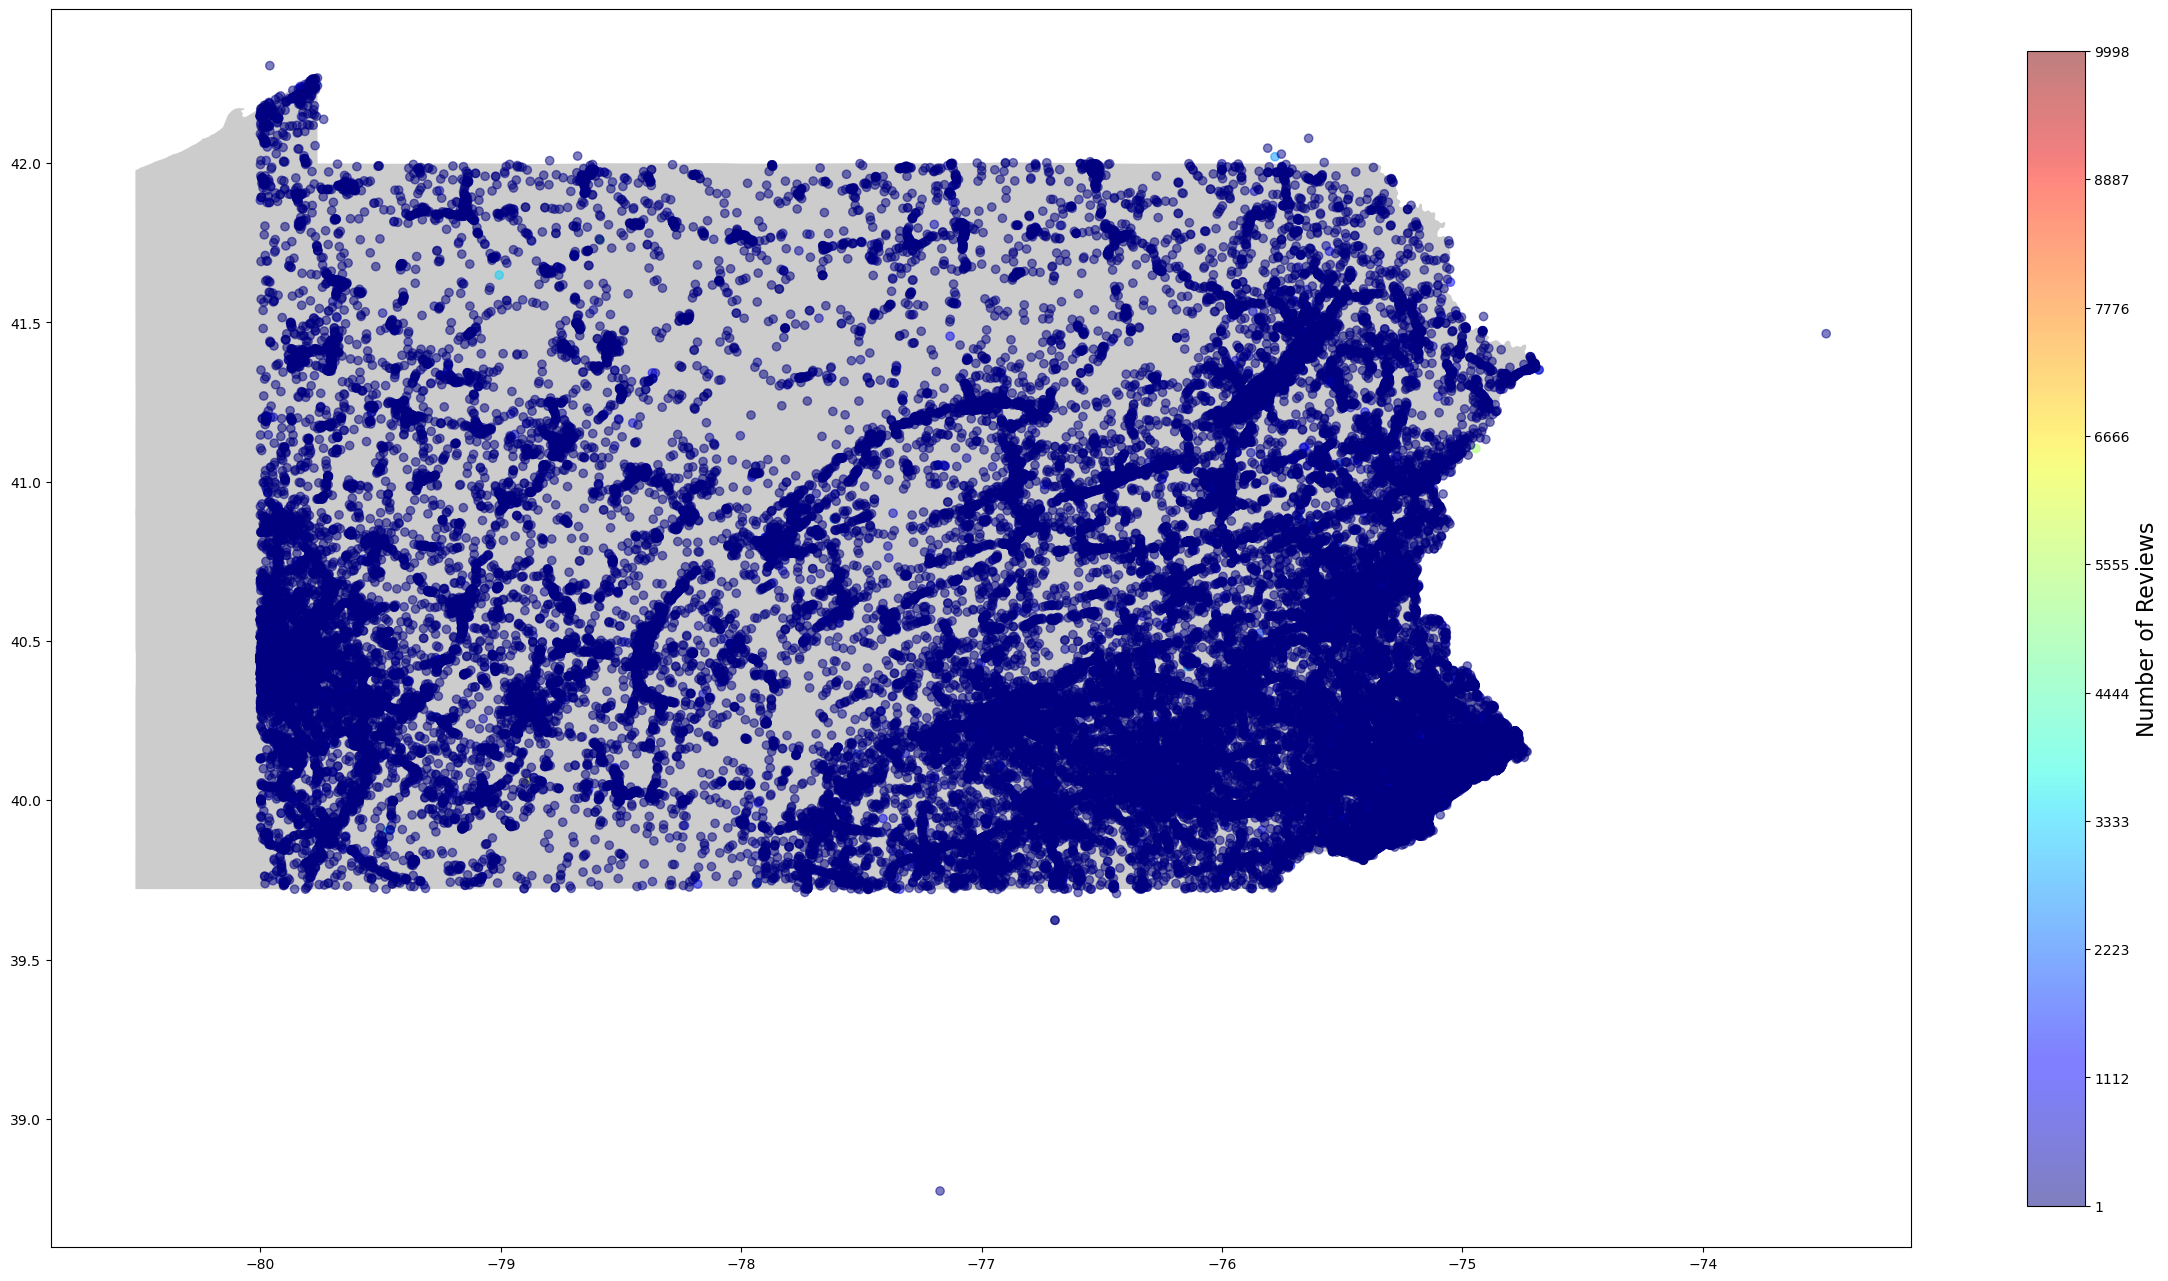

In [229]:

fig, ax=plt.subplots(figsize=(30,30))
pa.plot(ax=ax,legend=True,alpha=0.4, color='grey')
plt.scatter(metadata_df["longitude"],metadata_df["latitude"],c=metadata_df["num_of_reviews"],cmap=plt.get_cmap("jet"),alpha=0.5)
num_reviews = metadata_df["num_of_reviews"]
ticks = np.linspace(num_reviews.min(),num_reviews.max(), num=10)
cbar = plt.colorbar(shrink=0.5)
tick_lables = [round(v) for v in ticks]
cbar.set_ticks(tick_lables)
cbar.set_label('Number of Reviews', fontsize=16)

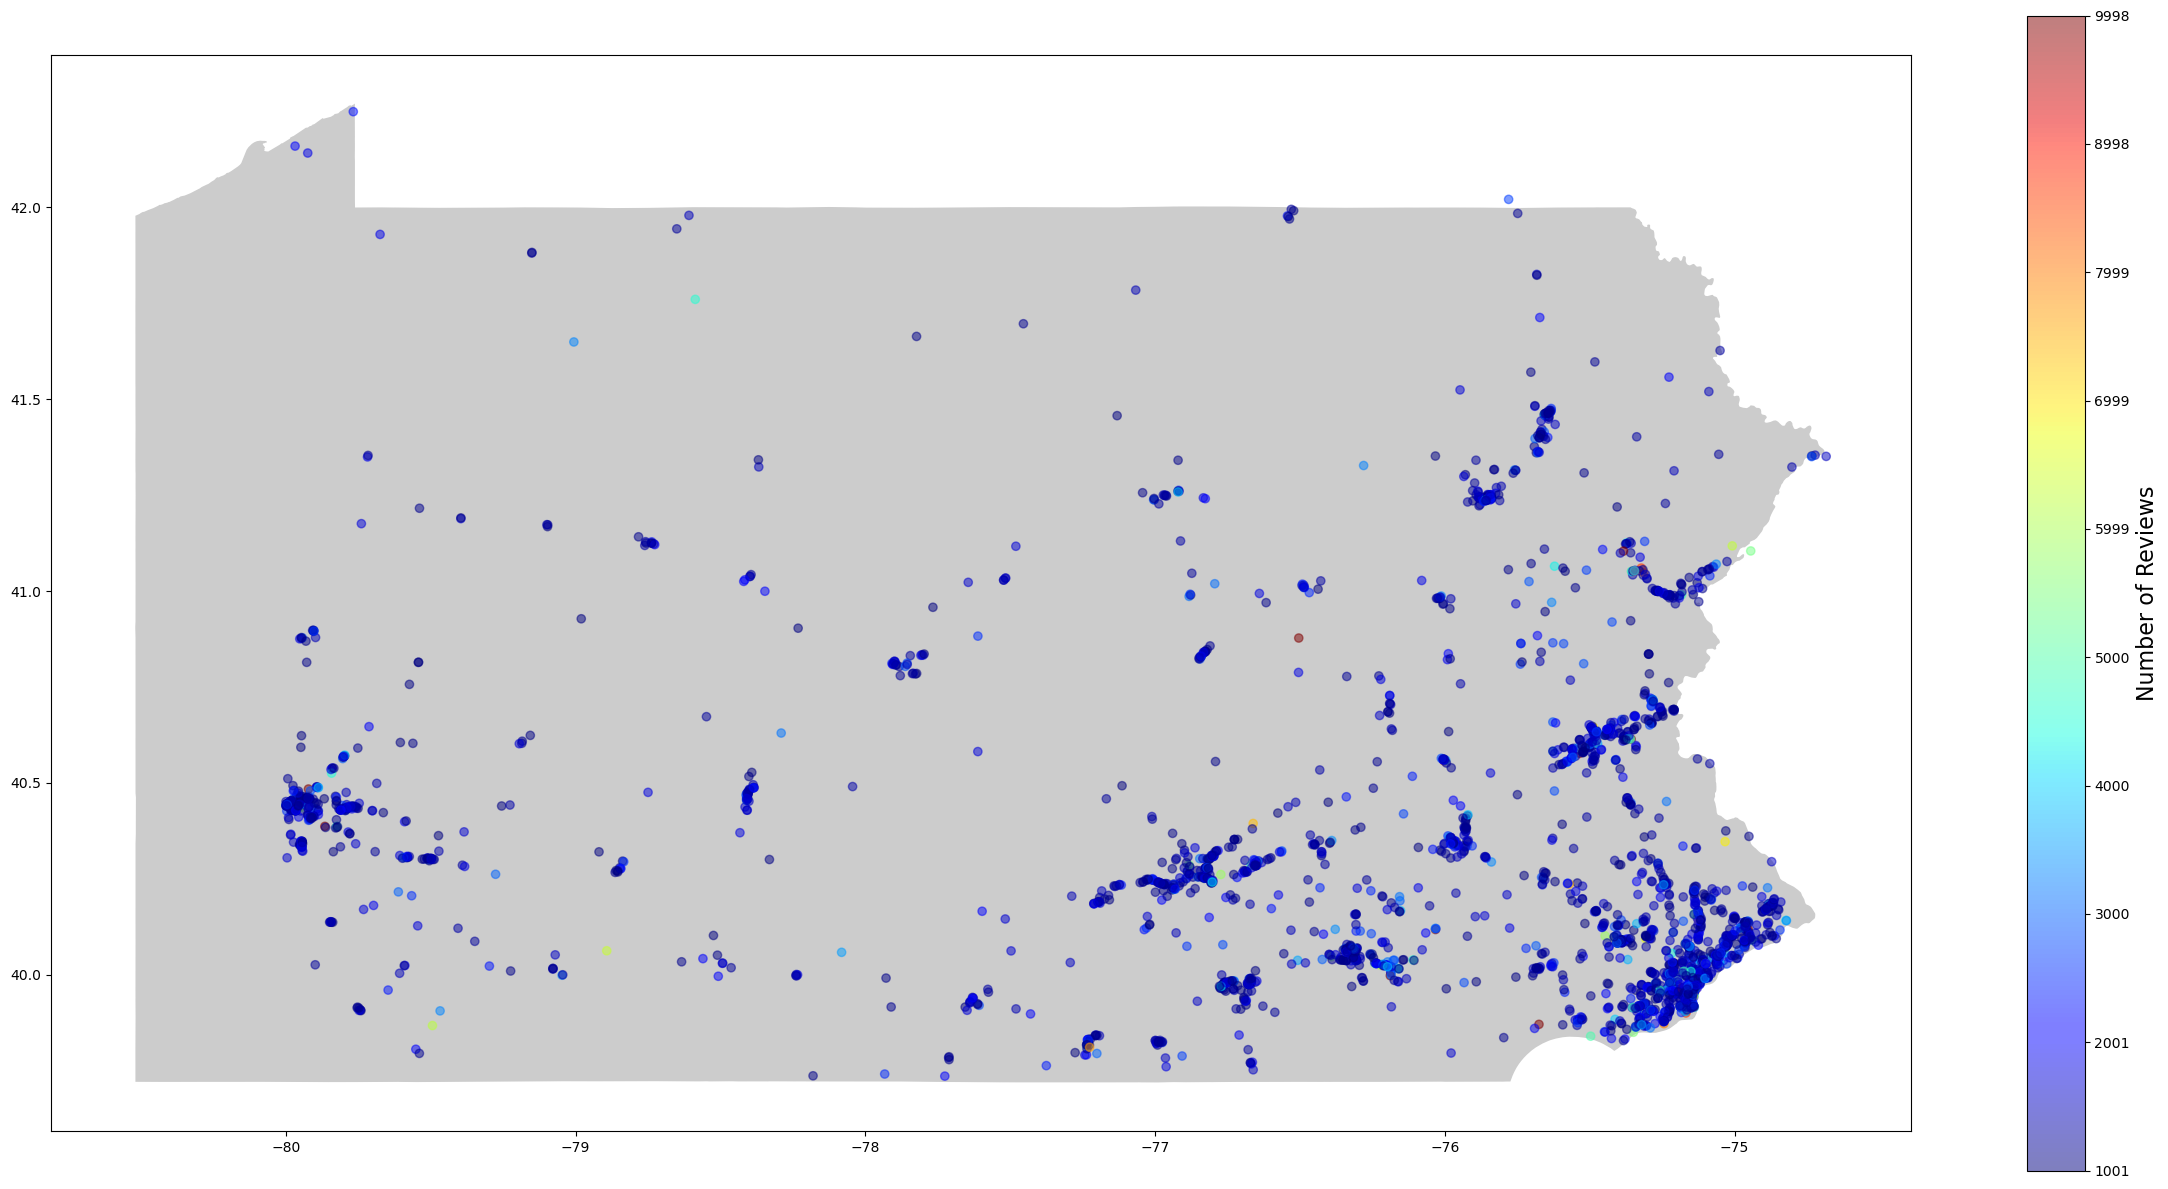

In [23]:
greatorreviews_df = metadata_df[metadata_df["num_of_reviews"]>1000]

fig, ax=plt.subplots(figsize=(30,30))
pa.plot(ax=ax,legend=True,alpha=0.4, color='grey')
plt.scatter(greatorreviews_df["longitude"],greatorreviews_df["latitude"],c=greatorreviews_df["num_of_reviews"],cmap=plt.get_cmap("jet"),alpha=0.5)
num_reviews = greatorreviews_df["num_of_reviews"]
ticks = np.linspace(num_reviews.min(),num_reviews.max(), num=10)
cbar = plt.colorbar(shrink=0.5)
tick_lables = [round(v) for v in ticks]
cbar.set_ticks(tick_lables)
cbar.set_label('Number of Reviews', fontsize=16)

<h2>Business with only one rating catgeory/h2>

In [890]:
# Find business where are all the reviews rating are same.
businessbyrating = pd.DataFrame(df.groupby(["gmap_id","business_name","rating"]).count()["num_of_reviews"].reset_index())
# Group the above result to find the number of reviews in total
businessiwthonlyonerating = pd.DataFrame(businessbyrating.groupby(["gmap_id"]).count()['num_of_reviews'].reset_index())
#Get business with only one rating in general
business_onerated = businessiwthonlyonerating[businessiwthonlyonerating['num_of_reviews']==1]["gmap_id"]
#Get the details for the above business
businesswithonlyonereview = businessbyrating[businessbyrating['gmap_id'].isin(list(business_onerated))].sort_values(by='num_of_reviews', ascending = False)


In [966]:
businesswithonlyonereview

,gmap_id,business_name,rating,num_of_reviews
438846,0x89c85a2285c0d0d5:0xdad9646a40fa4cb7,David Ross Orthodontics,5.0,628
426806,0x89c6f18a343a49f7:0x88b6a8f6c4be7a3a,Evolution Payroll Services,5.0,401
98678,0x89c375afbf7cd931:0x4d1a993db1983952,The Mobile Cigar Lounge,5.0,265
228912,0x89c627a7edfcfd67:0x9f55d6775e366e9a,Richard Waine Photography,5.0,258
350088,0x89c6c0521368a08d:0x4610e43e98624d27,Faust Orthodontics,5.0,258
...,...,...,...,...
314542,0x89c6b44dd24a42cf:0x54751dfe2c560e81,Above All Auto,5.0,1
43910,0x8834ec679db2ee79:0xc202c379729d28ed,Shining Arrow Associates,5.0,1
480033,0x89c8c3b36891ce91:0x3b28b36448b27a8f,Oyster Mill,5.0,1
479960,0x89c8c3a42bdd8eeb:0x7f8141b552562af8,Grandon Farm Trail,5.0,1


Text(0, 0.5, 'Number of Reviews')

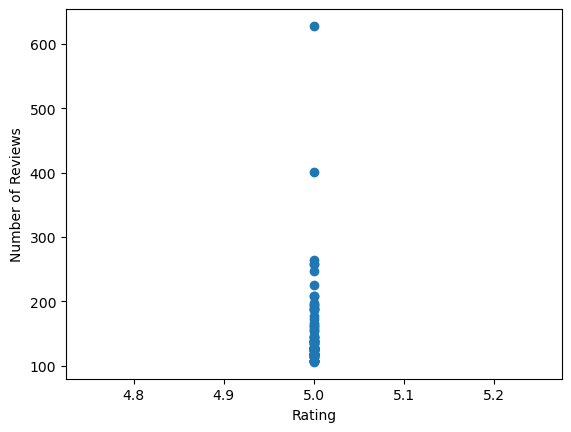

In [912]:
plt.scatter(businesswithonlyonereview.head(75)["rating"],businesswithonlyonereview.head(75)["num_of_reviews"])
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")

<H2>Analyze the influx of reviews over the time period for the top 5 businesses with only positive rating of 5.0</H2>

In [285]:
df["year"] = df['time'].dt.year
businesswithratingbyyear = pd.DataFrame(df.groupby(["gmap_id","year"])['num_of_reviews'].count().reset_index())

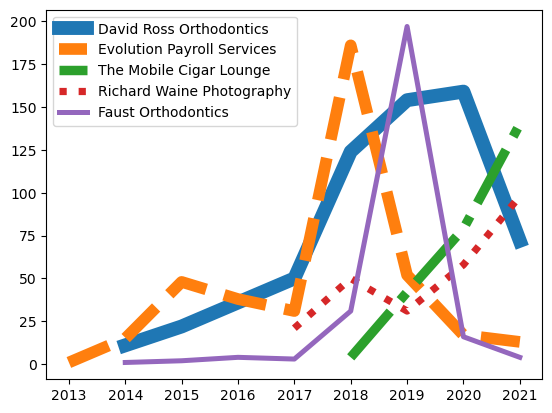

In [910]:
# Analyze the timing of the review for business

businesstoplot = list(businesswithonlyonereview.head(5)['gmap_id'])
#colors = ["red","green"]
#plt.figure(figsize=(10, 10))

for index,i in enumerate(businesstoplot):
    label = businesswithonlyonereview[businesswithonlyonereview["gmap_id"] == i]['business_name']
    lw=10-8*index/len(businesstoplot)
    ls=['-','--','-.',':'][index%4]
    plt.plot(businesswithratingbyyear[businesswithratingbyyear["gmap_id"] == i]["year"],businesswithratingbyyear[businesswithratingbyyear["gmap_id"] == i]["num_of_reviews"],linestyle=ls, linewidth=lw, label = label)

plt.legend()
plt.show()




<H2>Analyze the influx of reviews over the time period for the top 15 businesses</H2>

In [917]:
# Doing the same for business with lot of reviews

# business with large number of reviews
hightestratedbusiness = metadata_df.sort_values(by="num_of_reviews", ascending = False)


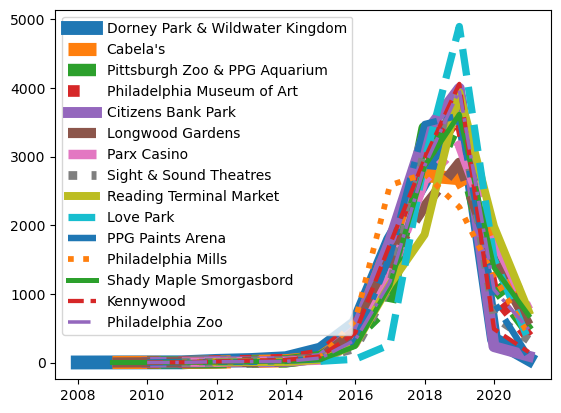

In [919]:
# Analyze the timing of the review for business over the 8 year period

businesstoplot = list(hightestratedbusiness["gmap_id"][:15])
#colors = ["red","green"]
#plt.figure(figsize=(10, 10))

for index,i in enumerate(businesstoplot):
    label = hightestratedbusiness[hightestratedbusiness["gmap_id"] == i]['business_name']
    lw=10-8*index/len(businesstoplot)
    ls=['-','--','-.',':'][index%4]
    plt.plot(businesswithratingbyyear[businesswithratingbyyear["gmap_id"] == i]["year"],businesswithratingbyyear[businesswithratingbyyear["gmap_id"] == i]["num_of_reviews"],linestyle=ls, linewidth=lw, label = label)

plt.legend()
plt.show()




In [11]:
businessyearwithratingcount = pd.DataFrame(df.groupby(["gmap_id","business_name","year","rating"])['num_of_reviews'].count().reset_index())
businessyearwithratingcount[(businessyearwithratingcount['year'] == 2017) & (businessyearwithratingcount['business_name'] == 'Dorney Park & Wildwater Kingdom')]

,gmap_id,business_name,year,rating,num_of_reviews
387210,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2017,1.0,72
387211,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2017,2.0,38
387212,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2017,3.0,122
387213,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2017,4.0,361
387214,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2017,5.0,1191


In [13]:
businessyearwithratingcount[(businessyearwithratingcount['year'] == 2018) & (businessyearwithratingcount['business_name'] == 'Dorney Park & Wildwater Kingdom')]

,gmap_id,business_name,year,rating,num_of_reviews
387215,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2018,1.0,113
387216,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2018,2.0,66
387217,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2018,3.0,200
387218,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2018,4.0,534
387219,0x89c4309b3e647929:0x4ecce74a41b8eb22,Dorney Park & Wildwater Kingdom,2018,5.0,1741


In [979]:
#2017 to 2020 are the four years for which dataset has a higher number of reviews


In [277]:
# Find business with highest number of reviews by same user
df.groupby(["user_id","business_name"]).count()["gmap_id"].sort_values(ascending = False)

user_id       business_name       
1.141328e+20  Weis Markets            81
1.078737e+20  Sheetz                  56
1.087658e+20  Starbucks               54
1.145589e+20  Dollar General          49
1.111387e+20  McDonald's              48
                                      ..
1.062174e+20  TGI Fridays              1
              TOPS Friendly Market     1
              Brinks Home™             1
              Peaceable Kingdom        1
1.184467e+20  Wilkie Lexus             1
Name: gmap_id, Length: 18321029, dtype: int64

In [247]:
metadata_df.groupby(["business_name"]).count().sort_values(by = 'gmap_id',ascending = False)

,user_id,time,gmap_id,description,state,text,rating,latitude,longitude,avg_rating,num_of_reviews
business_name,,,,,,,,,,,
Dollar General,677,677,677,677,677,677,677,677,677,677,677
Subway,622,622,622,622,622,622,622,622,622,622,622
Dunkin',538,538,538,538,538,538,538,538,538,538,538
United States Postal Service,445,445,445,445,445,445,445,445,445,445,445
McDonald's,426,426,426,426,426,426,426,426,426,426,426
...,...,...,...,...,...,...,...,...,...,...,...
Gimbel Field,1,1,1,1,1,1,1,1,1,1,1
Gilson Snow,1,1,1,1,1,1,1,1,1,1,1
Gilpin Rifle Range,1,1,1,1,1,1,1,1,1,1,1


In [249]:
userssamebusinessmultiplereviews = pd.DataFrame(df.groupby(["user_id","business_name","latitude","longitude"]).count()["gmap_id"].sort_values(ascending = False).reset_index())

In [259]:
userssamebusinessmultiplereviews[userssamebusinessmultiplereviews["gmap_id"]>1]

#Take the latest review and remove all others

,user_id,business_name,latitude,longitude,gmap_id
0,1.141847e+20,ARCannabisClinic.com - Same Day Online Card Ap...,40.994593,-77.604989,3
1,1.091304e+20,Pocono Mountain Villas by Exploria Resorts,41.076850,-75.026198,2
2,1.093564e+20,Philadelphia Dental Associates,39.953289,-75.173645,2
3,1.134716e+20,Pocono Mountain Villas by Exploria Resorts,41.076850,-75.026198,2
4,1.005712e+20,City Cruises Philadelphia,39.941598,-75.141250,2
...,...,...,...,...,...
775,1.150284e+20,Marmont Steakhouse and Bar,39.949878,-75.144574,2
776,1.079580e+20,AutoZone Auto Parts,40.423227,-79.662546,2
777,1.124910e+20,Bourbon Mill,39.861455,-77.072725,2
778,1.107251e+20,Moviltech Cell Phone Repair & Accessories- Cus...,40.272313,-78.856489,2


<h2>#If the user has multiple reviews for the same business, only retain the latest</h2>

'Business with larger than 3000 reviews have a higher average rating'

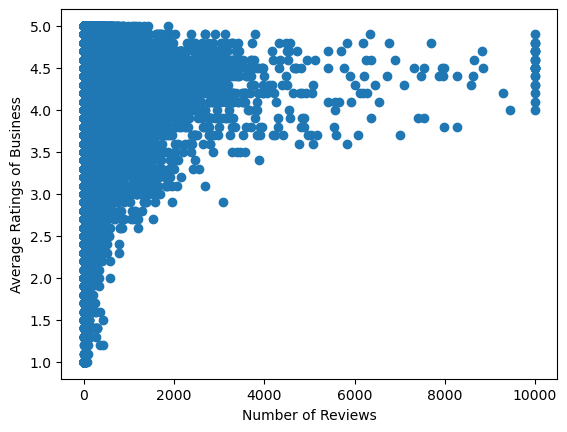

In [199]:
# analysis between avg_rating and number of reviews of business

plt.scatter(metadata_df["num_of_reviews"], metadata_df["avg_rating"])
plt.xlabel("Number of Reviews")
plt.ylabel("Average Ratings of Business")
"""Business with larger than 3000 reviews have a higher average rating"""


<h1> Univariate Analysis</h1>

{'whiskers': [<matplotlib.lines.Line2D at 0x1dfd8a064b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dfd8a06ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dfd8a06000>],
 'medians': [<matplotlib.lines.Line2D at 0x1dfd8a07b30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dfd8a24080>],
 'means': []}

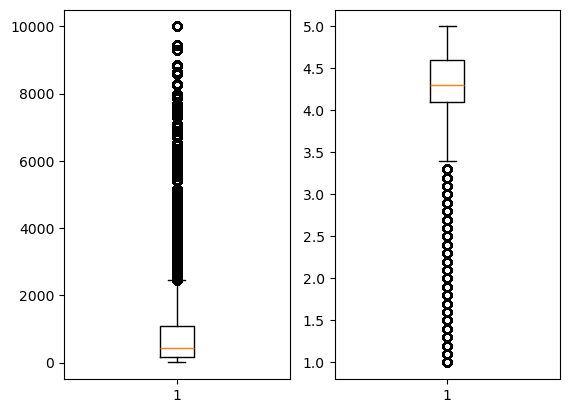

In [221]:
_,ax = plt.subplots(1,2)
ax[0].boxplot(df["num_of_reviews"])
ax[1].boxplot(df["avg_rating"])

In [299]:

df.head()

,user_id,time,gmap_id,business_name,description,state,text,rating,latitude,longitude,avg_rating,num_of_reviews,year
0,1.082528e+20,1990-12-31,0x89c15651a5aee36d:0xf7cdbf7dc059c957,Charcoal BYOB,"Creative, market-driven fare & river views are...",Closed ⋅ Opens 8AM,Finally a gastronomic experienece in Bucks cou...,5.0,40.244506,-74.835622,4.6,513,1990
1,1.064611e+20,1990-12-31,0x89c69441aa31c5b9:0x1bd7bceb16c01aa5,Creed's Seafood & Steaks,Steaks & seafood served in a comfortable setti...,Closed ⋅ Opens 4PM,"Good, traditional steakhouse. Professional se...",4.0,40.089772,-75.413792,4.5,543,1990
2,1.054456e+20,1990-12-31,0x89c6c60f6cd77ad1:0x360ab91a846d0252,Tre Scalini,Homemade pastas & other regional & traditional...,Opens soon ⋅ 5PM,"Price adjusted, one of the best deals in the c...",4.0,39.926207,-75.167524,4.6,98,1990
3,1.073658e+20,1990-12-31,0x89c6c61c1958c901:0xa2a4c589ef72ebc3,Geno's Steaks,Diehards line up 24/7 for the cheesesteaks ser...,Open 24 hours,None,4.0,39.933824,-75.158839,4.0,9440,1990
4,1.088639e+20,1990-12-31,0x89c6953ed728f5b1:0x6ec7bda050831b1f,Susanna Foo,Innovative Pan-Asian dishes prepared using cla...,Permanently closed,Good Asian Fushion cooking. Outdoor patio is ...,5.0,40.041417,-75.367963,3.8,8,1990


In [307]:
df.describe()

,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews,year
count,1.898369e+07,18983693,1.898369e+07,1.898369e+07,1.898369e+07,1.898369e+07,1.898369e+07,1.898369e+07
mean,1.092152e+20,2019-02-18 02:37:54.104505088,4.283160e+00,4.036093e+01,-7.644805e+01,4.288714e+00,9.782737e+02,2.018635e+03
min,1.000000e+20,1990-12-31 00:00:00,1.000000e+00,3.877363e+01,-8.000000e+01,1.000000e+00,1.000000e+00,1.990000e+03
25%,1.046190e+20,2018-04-12 12:42:27.024999936,4.000000e+00,4.001964e+01,-7.697282e+01,4.100000e+00,1.580000e+02,2.018000e+03
50%,1.091935e+20,2019-03-29 16:13:49.216000,5.000000e+00,4.023282e+01,-7.570169e+01,4.300000e+00,4.380000e+02,2.019000e+03
75%,1.138228e+20,2020-01-27 01:00:55.576999936,5.000000e+00,4.057372e+01,-7.522620e+01,4.600000e+00,1.075000e+03,2.020000e+03
max,1.184467e+20,2021-09-08 20:37:19.739000,5.000000e+00,4.230624e+01,-7.348741e+01,5.000000e+00,9.998000e+03,2.021000e+03
std,5.321418e+18,NaN,1.170901e+00,4.563050e-01,1.601945e+00,4.344048e-01,1.594805e+03,1.411201e+00


In [309]:
low_threshold = 1 + round(4/3) 
high_threshold = 5 - round(4/3)
low_threshold,high_threshold

(2, 4)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18983693 entries, 0 to 18983692
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         float64       
 1   time            datetime64[ns]
 2   gmap_id         object        
 3   business_name   object        
 4   description     object        
 5   state           object        
 6   text            object        
 7   rating          float64       
 8   latitude        float64       
 9   longitude       float64       
 10  avg_rating      float64       
 11  num_of_reviews  int64         
 12  year            int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(5)
memory usage: 1.8+ GB


In [315]:
new_df = df.drop(["gmap_id","user_id","description","state","text"], axis =1)

In [319]:
new_df.drop(["business_name"], axis =1, inplace = True)

In [321]:
new_df.corr()

,time,rating,latitude,longitude,avg_rating,num_of_reviews,year
time,1.000000,0.049397,0.022255,-0.004903,0.063169,-0.042750,0.978974
rating,0.049397,1.000000,0.004452,-0.004306,0.370348,0.003913,0.048485
latitude,0.022255,0.004452,1.000000,-0.208054,0.011650,-0.081328,0.020904
longitude,-0.004903,-0.004306,-0.208054,1.000000,-0.010926,0.079617,-0.004500
avg_rating,0.063169,0.370348,0.011650,-0.010926,1.000000,0.010069,0.061041
num_of_reviews,-0.042750,0.003913,-0.081328,0.079617,0.010069,1.000000,-0.044838
year,0.978974,0.048485,0.020904,-0.004500,0.061041,-0.044838,1.000000


<Axes: >

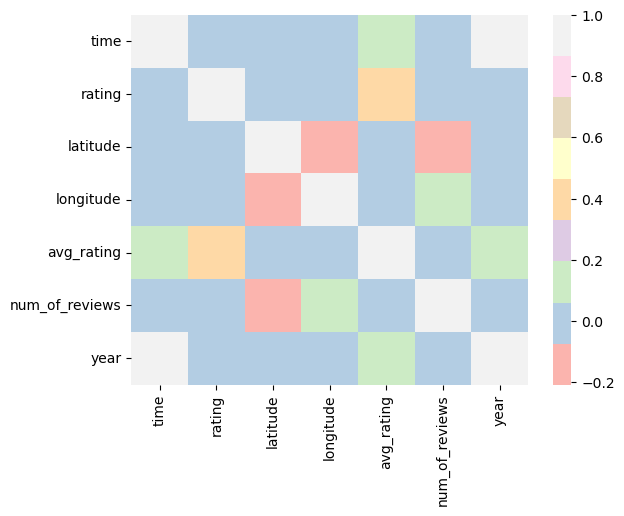

In [323]:
sns.heatmap(new_df.corr(), cmap = 'Pastel1')

EDA Results Analysis

1. Most of the reviews in the systems are from 2016 to 2022. Remove reviews before 2016
2. Users have reviewed same business multiple times, just retain the latest as it shows customers latest preference




